# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

from joblib import dump


# Загружаем датасет и разбиваем её на выборку.

In [2]:
data = pd.read_csv(
    '../Data/DataLaba1/energy_task_moded_removed_nan.csv').drop('year', axis=1)
a = -1
b = 1
power = 2
# data = data.apply(lambda s: a + (s - s.min())/(s.max() - s.min()) * (b-a))
sl = data.shape[0]
scale = StandardScaler().fit_transform(data)
# y_data = StandardScaler().fit_transform(data['Appliances'][0:sl])
X_train, X_test, y_train, y_test = train_test_split(PolynomialFeatures(power).fit_transform(data.drop('Appliances', axis=1)), scale.T[-1], test_size=0.25)


In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(int(X_train.shape[1]*1.5),
                                activation='sigmoid',
                                input_shape=(X_train.shape[1],),
                                name='input',
                              #   kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                # bias_initializer=tf.keras.initializers.GlorotNormal,
                                use_bias=True
                                ))
model.add(tf.keras.layers.Dense(int(X_train.shape[1]//2),
                                activation='sigmoid',
                                name='hidden_layer_2',
                                #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.GlorotNormal
                                ))
model.add(tf.keras.layers.Dense(int(X_train.shape[1]*0.5),
                                activation='sigmoid',
                                name='hidden_layer_3',
                                #   bias_constraint=tf.keras.constraints.max_norm(1000.),
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.GlorotNormal
                                ))
model.add(tf.keras.layers.Dense(1,
                                name='output',
                                activation='tanh',
                                # kernel_regularizer=tf.keras.regularizers.L1L2(l1=93, l2=93),
                                use_bias=True,
                                # bias_initializer=tf.keras.initializers.HeNormal
                                ))
model.compile(loss='mse',optimizer='Adam', metrics=['mse'])


## Компиляция

In [4]:
model.compile(
    optimizer='Adam',
    loss='mse',
    metrics=['mse', 'mae'],
    jit_compile=True
)


# Обучение

In [5]:
model.fit(
    X_train,
    y_train,
    validation_split=0.6,
    epochs=50,
    batch_size=15,
    # workers=4,
    use_multiprocessing=True,
)


Epoch 1/50
371/371 [==============================] - 5s 8ms/step - loss: 0.1011 - mse: 0.1011 - mae: 0.2162 - val_loss: 0.0782 - val_mse: 0.0782 - val_mae: 0.1867
Epoch 2/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0793 - mse: 0.0793 - mae: 0.1888 - val_loss: 0.0785 - val_mse: 0.0785 - val_mae: 0.1913
Epoch 3/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0788 - mse: 0.0788 - mae: 0.1854 - val_loss: 0.0754 - val_mse: 0.0754 - val_mae: 0.1715
Epoch 4/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0770 - mse: 0.0770 - mae: 0.1786 - val_loss: 0.0758 - val_mse: 0.0758 - val_mae: 0.1773
Epoch 5/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0773 - mse: 0.0773 - mae: 0.1812 - val_loss: 0.0755 - val_mse: 0.0755 - val_mae: 0.1737
Epoch 6/50
371/371 [==============================] - 2s 6ms/step - loss: 0.0773 - mse: 0.0773 - mae: 0.1816 - val_loss: 0.0751 - val_mse: 0.0751 - val_mae: 0.1705
Epoch 7/50
371/3

# Predict

In [6]:
y_predicted = model.predict(X_test).T[0]


145/145 [==============================] - 1s 2ms/step


In [7]:
y_predicted


array([-0.30573288,  0.18897672, -0.393289  , ...,  0.661052  ,
        0.0072635 , -0.99998343], dtype=float32)

In [8]:
y_predicted.mean(), y_predicted.std()


(-0.02746473, 0.78254545)

In [9]:
model.weights

[<tf.Variable 'input/kernel:0' shape=(435, 652) dtype=float32, numpy=
 array([[-0.01344758,  0.00535914,  0.02959256, ..., -0.0708201 ,
         -0.06194422, -0.02732178],
        [-0.01691038,  0.05754004, -0.03236413, ...,  0.04151144,
          0.01207282,  0.00059702],
        [-0.02964621,  0.02514137, -0.07510153, ..., -0.01083117,
          0.03143378, -0.05969789],
        ...,
        [-0.06783552, -0.07094099,  0.04747241, ...,  0.03549352,
         -0.00105621,  0.03760621],
        [ 0.04037695,  0.03586594,  0.04052361, ..., -0.03702131,
         -0.03025522, -0.03923204],
        [-0.04400599, -0.06559725, -0.07368261, ..., -0.04940621,
         -0.01974613,  0.0497752 ]], dtype=float32)>,
 <tf.Variable 'input/bias:0' shape=(652,) dtype=float32, numpy=
 array([ 0.00000000e+00,  0.00000000e+00, -1.17610162e-02,  6.39613066e-03,
         0.00000000e+00,  9.85517749e-04, -1.51707400e-06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e

# Оценка качества 

In [10]:
y_all = model.predict(PolynomialFeatures(power).fit_transform(
    data.drop('Appliances', axis=1)[0:sl])).T[0]


580/580 [==============================] - 1s 2ms/step


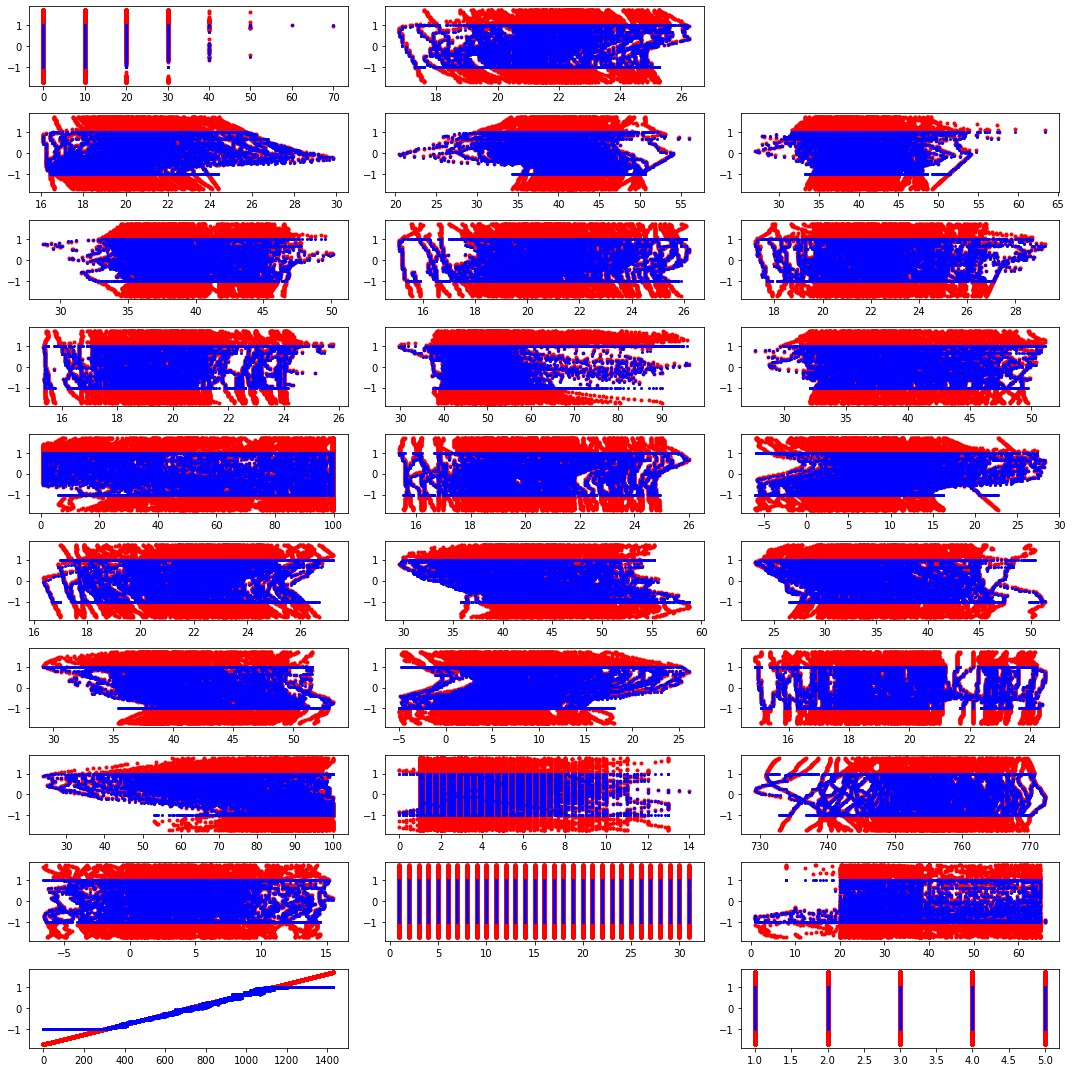

In [11]:
import matplotlib.gridspec as gridspec

fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
c = data.drop('Appliances', axis=1).columns
xl = c.shape[0] // 3 + (c.shape[0] % 3 > 0)
yl = 3
gs = gridspec.GridSpec(xl, yl)
z=0
k=0
for i in c:
  z = z % xl
  k = k % yl
  ax = fig.add_subplot(gs[int(z), int(k)])
  ax.plot(data[i], scale.T[-1], 'ro', markersize=3)
  ax.plot(data[i], y_all, 'bo', markersize=2)
  k+=1
  z+=(k % 3) // 2
  

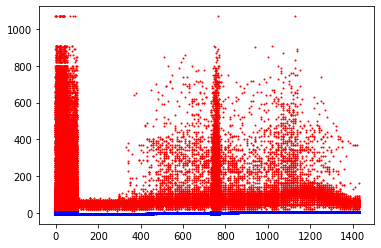

In [12]:
plt.plot(data.drop('Appliances', axis=1)[0:sl],
         data['Appliances'][0:sl], 'ro', markersize=1)
plt.plot(data.drop('Appliances', axis=1)[0:sl], y_all*6.1, 'bo', markersize=1)


In [13]:
print(f"MAE: {mean_absolute_error(y_predicted*2.7, y_test)}",
      f'RMSE: {mean_squared_error(y_predicted*2.7, y_test)}',
      f'MSE: {mean_squared_error(y_predicted*2.7, y_test)**0.5}',
      f'MAPE: {mean_absolute_percentage_error(y_predicted*2.7, y_test)}',
      f'R^2: {r2_score(y_test, y_predicted)}',
      sep='\n')

MAE: 1.0525879311972148
RMSE: 1.321503362616135
MSE: 1.1495665977298293
MAPE: 0.5995274060376051
R^2: 0.9210649573758936
